# Importar librerías

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

# Importar csv generado a partir de la limpieza

In [18]:
import pandas as pd

url = 'data_limpio.csv'
df = pd.read_csv(url)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    840 non-null    int64 
 1   Title         840 non-null    object
 2   FirstName     840 non-null    object
 3   MiddleName    500 non-null    object
 4   LastName      840 non-null    object
 5   Suffix        48 non-null     object
 6   CompanyName   840 non-null    object
 7   SalesPerson   840 non-null    object
 8   EmailAddress  840 non-null    object
 9   Phone         840 non-null    object
 10  PasswordHash  840 non-null    object
 11  PasswordSalt  840 non-null    object
 12  rowguid       840 non-null    object
 13  ModifiedDate  840 non-null    object
dtypes: int64(1), object(13)
memory usage: 92.0+ KB


# Tranformación de la variable a predecir "ModifiedDate"

In [19]:
df["ModifiedDate"] = pd.to_datetime(df["ModifiedDate"])
df["DaysSinceModified"] = (df["ModifiedDate"] - df["ModifiedDate"].min()).dt.days

Se convierte a tipo fecha ya que python los importa con el tipo de dato en string y crea la variable numérica a predecir haciendo una diferencia de fecha desde la menor fecha encontrada hasta la fecha del registro en días

# Asignación de las variables a predecir y predictoras

In [ ]:
# Crear variable objetivo
y = df["DaysSinceModified"]

# Seleccionar todas las columnas excepto la de salida
X = df.drop(columns=["DaysSinceModified", "ModifiedDate"])


# Transformación de variables tipo texto a numérico

In [36]:
for col in X.select_dtypes(include=["object", "category"]).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))  # Convierte NaNs en strings si los hay

# Separación en entrenamiento y prueba

In [37]:
# Separar en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento y evaluación del modelo

Mean Squared Error (MSE): 44402.30 días²


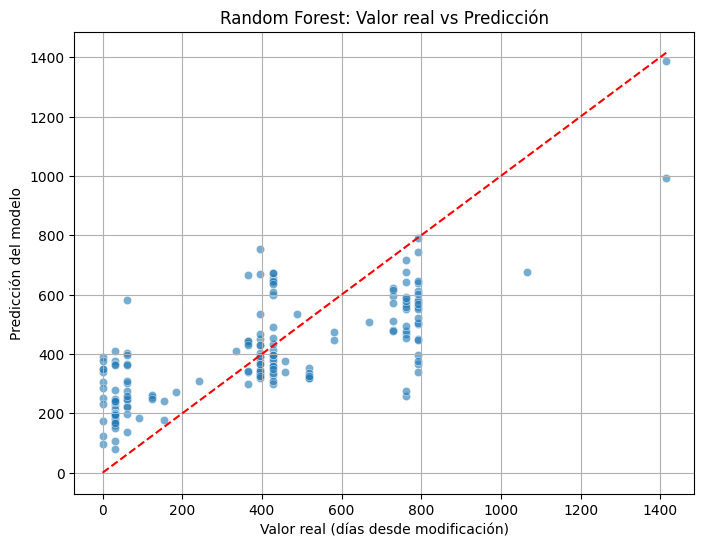

In [38]:
# Crear y entrenar modelo Random Forest
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predecir
y_pred = model.predict(X_test)

# Calcular MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f} días²")

# Graficar: predicción vs valor real
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valor real (días desde modificación)")
plt.ylabel("Predicción del modelo")
plt.title("Random Forest: Valor real vs Predicción")
plt.grid(True)
plt.show()

In [39]:
# Guardar X_test
X_test.to_csv("X_test.csv", index=False)

# Guardar y_test (como DataFrame para tener una columna con nombre)
y_test.to_frame(name="DaysSinceModified").to_csv("y_test.csv", index=False)

In [40]:
import joblib

# Guardar el modelo con extensión .joblib
joblib.dump(model, "modelo_regresion.joblib")


['modelo_regresion.joblib']